Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [127]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [129]:
# Code here
automobiles_df = automobiles_df.drop(columns=["normalized-losses", "symboling"])


#### Remove any duplicate rows

In [130]:
# Code here
# Remove duplicate rows
duplicate_count = automobiles_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
automobiles_df = automobiles_df.drop_duplicates()

Number of duplicate rows: 0


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [131]:
# Code here
# Replace "?" with NaN and drop missing values
automobiles_df.replace("?", np.nan, inplace=True)
automobiles_df.dropna(inplace=True)

# Display remaining missing values
print("Missing values after cleaning:\n", automobiles_df.isna().sum())

Missing values after cleaning:
 make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [132]:
# Code here

# Convert 'num-of-doors' and 'num-of-cylinders' to integers
automobiles_df["num-of-doors"].replace({"two":2, "four":4}, inplace=True)
automobiles_df["num-of-cylinders"].replace(
    {"three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}, inplace=True
)

# Convert 'price' to int64
automobiles_df["price"] = pd.to_numeric(automobiles_df["price"], errors="coerce").astype("int64")

# Display data types and summary statistics
print(automobiles_df[["num-of-doors", "num-of-cylinders", "price"]].dtypes)


num-of-doors        int64
num-of-cylinders    int64
price               int64
dtype: object


C:\Users\juleigar\AppData\Local\Temp\ipykernel_22344\2023044.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  automobiles_df["num-of-doors"].replace({"two":2, "four":4}, inplace=True)
C:\Users\juleigar\AppData\Local\Temp\ipykernel_22344\2023044.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [133]:
# Create a dataframe with all the cars in the "hatchback' category
# hatchback_cars =
def filter_cars_by_body_style(df, body_style):
    """
    Returns a DataFrame filtered by a specific car body style.
    
    Parameters:
    df : pd.DataFrame
        The automobile dataset.
    body_style : str
        The body style to filter for (e.g., "hatchback", "sedan").
        
    Returns:
    pd.DataFrame
        Filtered DataFrame containing only cars with the given body style.
    """
    filtered_df = df[df["body-style"].str.lower() == body_style.lower()]
    print(f"Cars with body style '{body_style}':\n", filtered_df)
    return filtered_df


In [134]:
# 2. Price distribution
def plot_distribution_price(data=automobiles_df):
    sns.histplot(x="price", data=automobiles_df, bins=30, kde=True)
    plt.title("Distribution of Car Prices")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

In [135]:
#Correlation Matrix
def plot_correlation(df):
    cols = ['price', 'horsepower', 'city-mpg', 'highway-mpg', 'num-of-cylinders', 'engine-size']
    if 'fuel-type_diesel' in df.columns:
        cols.append('fuel-type_diesel')
    corr = df[cols].corr()
    print(corr['price'].sort_values(ascending=False))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

In [136]:
def top_expensive_cheapest_cars_table_plot(df, top_n=5):
    """
    Finds the top N most expensive and cheapest cars, prints tables including price groupings,
    and plots a comparison bar chart.
    
    Parameters:
    df : pd.DataFrame
        The automobile dataset (must include 'price' and 'car_price_groupings').
    top_n : int
        Number of top expensive and cheapest cars to display.
        
    Returns:
    tuple: (top_expensive, top_cheapest, merged_df_sorted) DataFrames
    """
    # Ensure 'car_price_groupings' exists
    if "car_price_groupings" not in df.columns:
        df["car_price_groupings"] = pd.cut(
            df["price"],
            bins=[0, 9999, 20000, float("inf")],
            labels=["Low-End", "Medium", "Luxury"],
            include_lowest=True
        )
    
    # Top N expensive and cheapest
    top_expensive = df.sort_values("price", ascending=False).head(top_n)
    top_cheapest = df.sort_values("price", ascending=True).head(top_n)
    
    # Print tables
    print(f"Top {top_n} Expensive Cars:\n")
    display(top_expensive[["make", "body-style", "car_price_groupings", "price", "city-mpg", "highway-mpg"]])
    
    print(f"\nTop {top_n} Cheapest Cars:\n")
    display(top_cheapest[["make", "body-style", "car_price_groupings", "price", "city-mpg", "highway-mpg"]])
    
    # Merge for combined comparison
    merged_df = pd.concat([top_cheapest, top_expensive], ignore_index=True)
    merged_df_sorted = merged_df.sort_values(by="price", ascending=False)
    
    print(f"\nComparison of Top {top_n} Most Expensive vs Top {top_n} Least Expensive Cars:\n")
    display(merged_df_sorted[["make", "body-style", "car_price_groupings", "price", "city-mpg", "highway-mpg"]])
    
    # Add labels for plotting
    merged_df_sorted["car_label"] = merged_df_sorted["make"] + " (" + merged_df_sorted["body-style"] + ")"
    
    # Plot bar chart
    plt.figure(figsize=(12,6))
    sns.barplot(x="car_label", y="price", hue="car_price_groupings", data=merged_df_sorted, palette="Set2")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Car")
    plt.ylabel("Price")
    plt.title(f"Top {top_n} Cheapest vs Most Expensive Cars")
    plt.legend(title="Price Group")
    plt.tight_layout()
    plt.show()
    
    return top_expensive, top_cheapest, merged_df_sorted


#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

In [137]:
# Code here
def top_fuel_efficient_cars(df, top_n=5):
    efficient = df.sort_values(by ="city-mpg", ascending = False).head(top_n)
    efficient["car"] = efficient["make"] + " (" + efficient["body-style"] + ")"
    efficient.plot(
        x="car",
        y=["city-mpg", "highway-mpg"],
        kind="bar",
        figsize=(10, 5),
        title="Top Fuel-Efficient Cars (City vs Highway MPG)"
    )
    plt.ylabel("MPG")
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()
    return efficient





#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

In [138]:
# Code here
def top_largest_engines(df, top_n=5):
    engine = df.sort_values(by = 'engine-size', ascending = False).head(top_n)
    engine["car"] = engine["make"] + " (" + engine["body-style"] + ")"
    engine["car_unique"] = engine["make"] + " (" + engine["body-style"] + ") - " + engine["engine-size"].astype(str)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(engine["car_unique"], engine["engine-size"], color="steelblue", label="Engine Size (cc)")
    ax1.set_ylabel("Engine Size (cc)")
    ax1.set_xlabel("Car")
    ax1.set_xticklabels(engine["car_unique"], rotation=30, ha='right')
    ax1.set_title("Top Cars with Largest Engines & Their Prices")

    ax2 = ax1.twinx()
    ax2.plot(engine["car_unique"], engine["price"], "ro-", label="Price")
    ax2.set_ylabel("Price ($)")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()
    return engine


#### Which vehicle manufacturer has the most car models in the dataset

In [139]:
def top_manufacturers(df, top_n=10):
    manufacturer_counts = df['make'].value_counts().head(top_n)
    manufacturer_counts.plot(kind='bar', color='skyblue', figsize=(10,6))
    plt.title("Top Manufacturers by Number of Car Models")
    plt.xlabel("Manufacturer")
    plt.ylabel("Number of Models")
    plt.xticks(rotation=45)
    plt.show()
    return manufacturer_counts

Execute Functions for EDA

Cars with body style 'hatchback':
             make fuel-type aspiration  num-of-doors body-style drive-wheels  \
2    alfa-romero       gas        std             2  hatchback          rwd   
18     chevrolet       gas        std             2  hatchback          fwd   
19     chevrolet       gas        std             2  hatchback          fwd   
21         dodge       gas        std             2  hatchback          fwd   
22         dodge       gas        std             2  hatchback          fwd   
..           ...       ...        ...           ...        ...          ...   
175       toyota       gas        std             4  hatchback          fwd   
177       toyota       gas        std             4  hatchback          fwd   
178       toyota       gas        std             2  hatchback          rwd   
179       toyota       gas        std             2  hatchback          rwd   
190   volkswagen       gas        std             2  hatchback          fwd   

    engine-locat

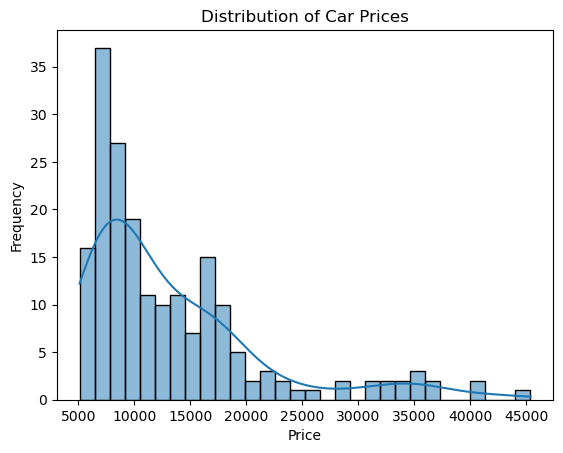

price               1.000000
engine-size         0.888778
horsepower          0.812453
num-of-cylinders    0.746007
city-mpg           -0.706618
highway-mpg        -0.719178
Name: price, dtype: float64


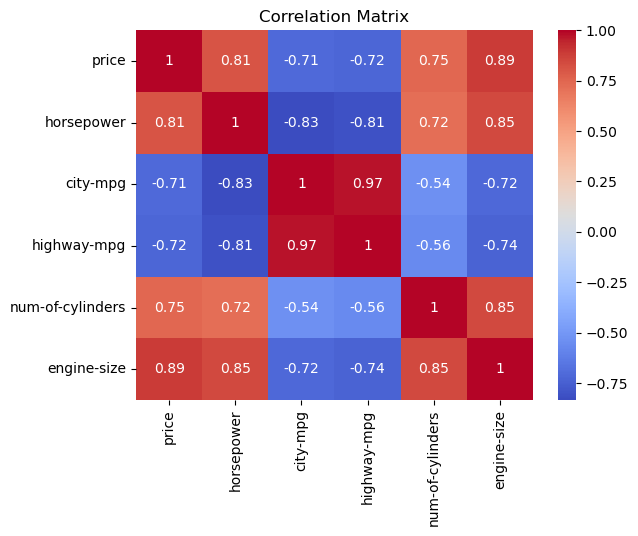

Top 5 Expensive Cars:



,make,body-style,car_price_groupings,price,city-mpg,highway-mpg
74,mercedes-benz,hardtop,Luxury,45400,14,16
16,bmw,sedan,Luxury,41315,16,22
73,mercedes-benz,sedan,Luxury,40960,14,16
128,porsche,convertible,Luxury,37028,17,25
17,bmw,sedan,Luxury,36880,15,20



Top 5 Cheapest Cars:



,make,body-style,car_price_groupings,price,city-mpg,highway-mpg
138,subaru,hatchback,Low-End,5118,31,36
18,chevrolet,hatchback,Low-End,5151,47,53
50,mazda,hatchback,Low-End,5195,30,31
150,toyota,hatchback,Low-End,5348,35,39
76,mitsubishi,hatchback,Low-End,5389,37,41



Comparison of Top 5 Most Expensive vs Top 5 Least Expensive Cars:



,make,body-style,car_price_groupings,price,city-mpg,highway-mpg
5,mercedes-benz,hardtop,Luxury,45400,14,16
6,bmw,sedan,Luxury,41315,16,22
7,mercedes-benz,sedan,Luxury,40960,14,16
8,porsche,convertible,Luxury,37028,17,25
9,bmw,sedan,Luxury,36880,15,20
4,mitsubishi,hatchback,Low-End,5389,37,41
3,toyota,hatchback,Low-End,5348,35,39
2,mazda,hatchback,Low-End,5195,30,31
1,chevrolet,hatchback,Low-End,5151,47,53
0,subaru,hatchback,Low-End,5118,31,36


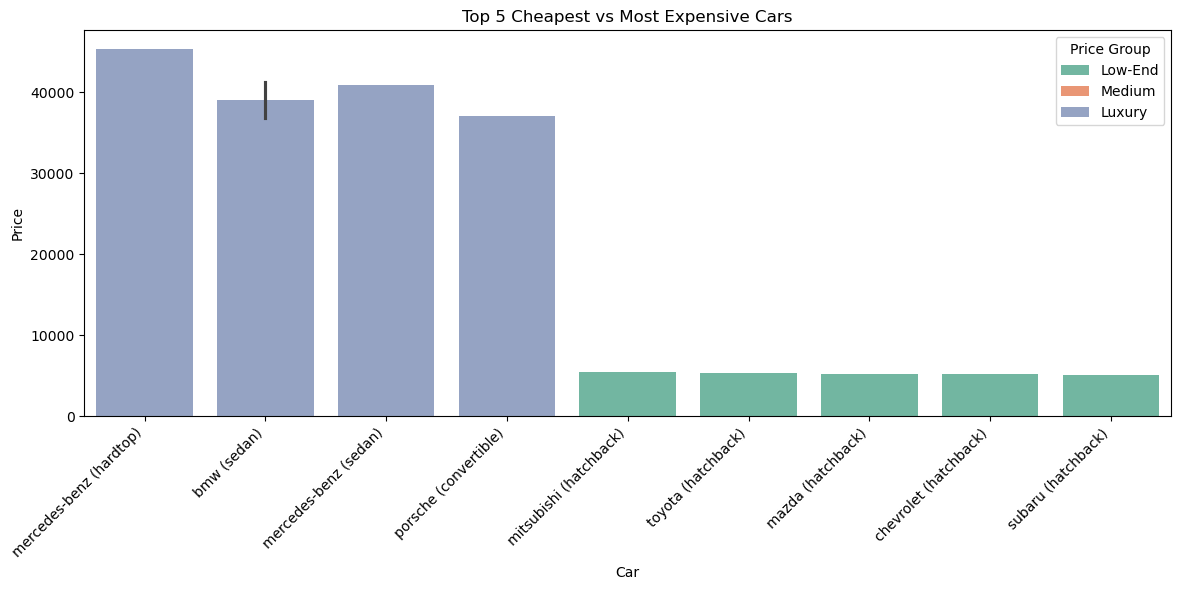

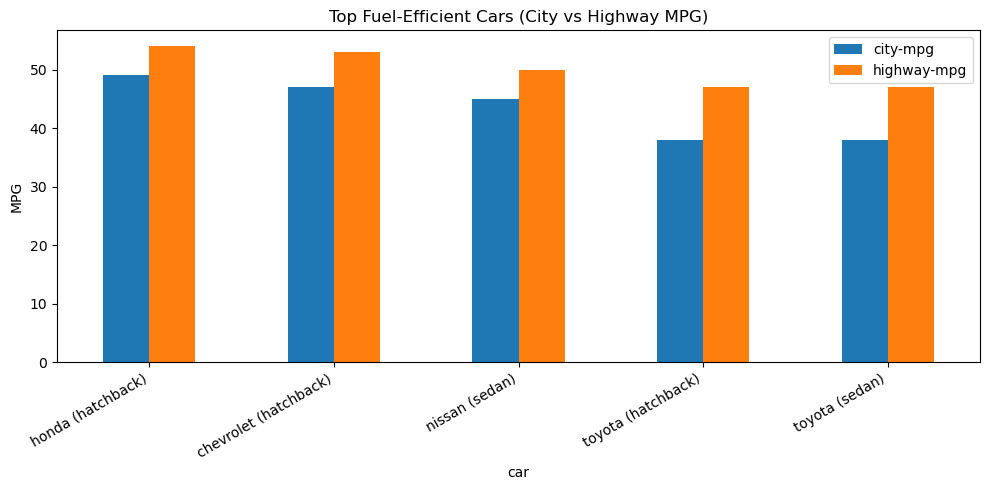

C:\Users\juleigar\AppData\Local\Temp\ipykernel_22344\3343038368.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(engine["car_unique"], rotation=30, ha='right')


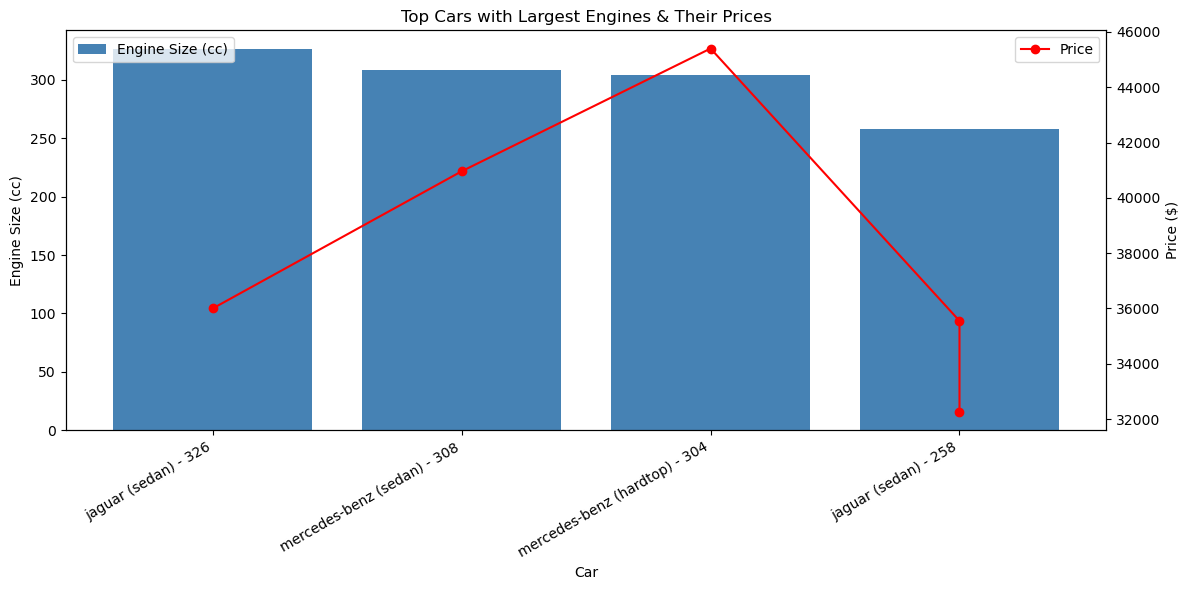

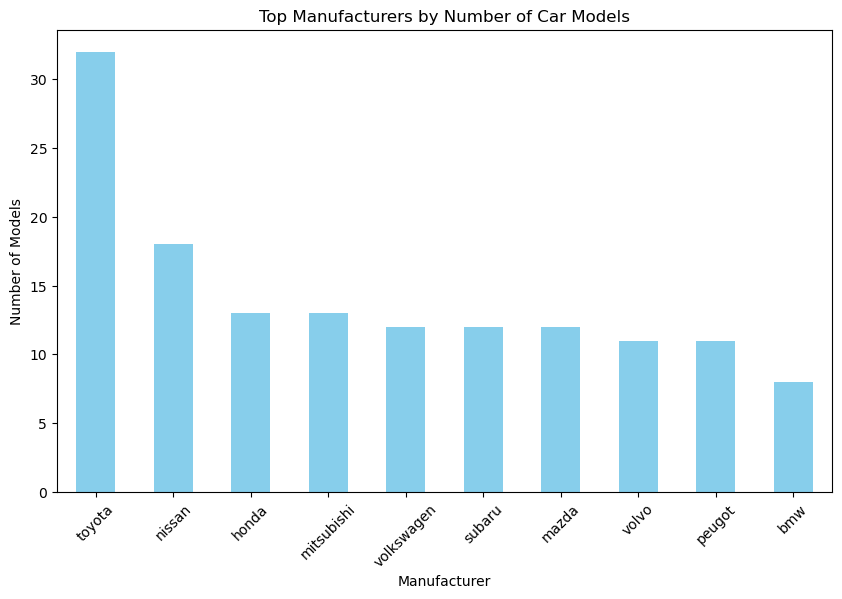

make
toyota        32
nissan        18
honda         13
mitsubishi    13
volkswagen    12
subaru        12
mazda         12
volvo         11
peugot        11
bmw            8
Name: count, dtype: int64

In [140]:
hatchback_cars = filter_cars_by_body_style(automobiles_df, "hatchback")
plot_distribution_price()
plot_correlation(automobiles_df)
top_exp, top_cheap, comparison_df = top_expensive_cheapest_cars_table_plot(automobiles_df, top_n=5)
top_fuel_efficient_cars(automobiles_df)
top_largest_engines(automobiles_df)
top_manufacturers(automobiles_df)



